## 프로젝트 개요
#### 1. 감성 분석의 기본 이해
#### 2. 데이터 전처리
#### 3. 모델 선택 및 학습
#### 4. 모델 평가
#### 5. 시각화 및 해석
#### 6. 보고서 작성

## | 1. 감성분석의 기본 이해
#### 대량의 텍스트를 분석하여 긍정적인 감정 표현과 부정적인 감정을 판단하는 분석임.

## | 2. 데이터 전처리
### 와인 리뷰 데이터의 감성 분석
#### 'wine_review.csv'파일을 활용하여 리뷰 속에 담긴 긍정 / 부정 감성을 파악하는 감성 분류 예측 모델 작성 

### 2.1 필요 Library 및 Data 로드

In [1]:
# 사용할 Library 로드

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
# 데이터 로드
df = pd.read_csv("wine_review.csv")

In [3]:
# 데이터 확인
df.head()

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2890 non-null   object 
 1   asins                 870 non-null    object 
 2   brand                 2825 non-null   object 
 3   categories            2890 non-null   object 
 4   dateAdded             2890 non-null   object 
 5   dateUpdated           2890 non-null   object 
 6   descriptions          2738 non-null   object 
 7   dimension             1838 non-null   object 
 8   ean                   2166 non-null   object 
 9   flavors               151 non-null    object 
 10  keys                  2890 non-null   object 
 11  manufacturer          849 non-null    object 
 12  manufacturerNumber    2457 non-null   object 
 13  name                  2890 non-null   object 
 14  reviews.date          2552 non-null   object 
 15  reviews.dateAdded    

### Feature Description
##### • rating: 이용자 리뷰의 평가 점수 (1~5)
##### • text: 이용자 리뷰 평가 내용

In [5]:
# dimension
df.shape

(2890, 32)

In [6]:
# 결측치 확인
df.isnull().sum()

id                         0
asins                   2020
brand                     65
categories                 0
dateAdded                  0
dateUpdated                0
descriptions             152
dimension               1052
ean                      724
flavors                 2739
keys                       0
manufacturer            2041
manufacturerNumber       433
name                       0
reviews.date             338
reviews.dateAdded          0
reviews.dateSeen           0
reviews.didPurchase      841
reviews.doRecommend      979
reviews.id              1005
reviews.numHelpful      2264
reviews.rating           445
reviews.sourceURLs         0
reviews.text               1
reviews.title             44
reviews.userCity        2808
reviews.userProvince    2881
reviews.username           1
sizes                   2868
sourceURLs                 0
upc                      147
weight                  1894
dtype: int64

### 2.2 영문 텍스트 데이터 전처리
텍스트 데이터를 단어 단위로 분리하는 전처리 과정 필요. 리뷰 평가 내용 단어화하여 형태소 추출 및 TF-IDF 변환

In [7]:
# text 변수 확인
df['reviews.text'][0]

'This a fantastic white wine for any occasion!'

In [8]:
# 정규 표현식
import re
import pandas as pd

def apply_regular_expression(text):
    # 영어 단어와 공백만을 추출하는 정규 표현식
    pattern = re.compile(r'[a-zA-Z\s]+')
    # 매칭된 부분만 추출하여 소문자로 변환
    matches = pattern.findall(text)
    cleaned_text = ' '.join(matches).lower()
    return cleaned_text

# NaN 값을 빈 문자열로 대체
df['reviews.text'] = df['reviews.text'].fillna("")

In [10]:
#결측값 처리
df = df.dropna(subset=['reviews.text', 'reviews.rating'])

In [11]:
apply_regular_expression(df['reviews.text'][0])

'this a fantastic white wine for any occasion'

In [12]:
# 전체 데이터프레임에 대해 함수를 적용
df['reviews.text'] = df['reviews.text'].apply(apply_regular_expression)

### 2.3 영문 형태소 분석
NLTK : 자연어 처리 라이브러리로, 형태소 분석을 위해 품사 태깅 사용 가능
    NLTK를 사용하여 영문 텍스트에서 명사, 동사, 형용사, 부사 추출

In [13]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [14]:
import nltk
from nltk.tokenize import word_tokenize
import string

In [15]:
#nltk 자원 다운로드

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# 명사, 동사, 형용사, 부사 형태소 추출을 위한 함수
def extract_words_with_tags(text):
    # 텍스트를 토큰화하고 품사 태깅
    tokens = word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    # 명사, 동사, 형용사, 부사 추출
    words = [word for word, pos in tagged_tokens if pos.startswith('N') or pos.startswith('V') or pos.startswith('J') or pos.startswith('R')]
    return words

In [17]:
# 예시 데이터의 첫 번째 리뷰 텍스트에 대해 전처리 및 필터링된 단어 추출
cleaned_text = apply_regular_expression(df['reviews.text'][0])
words = extract_words_with_tags(cleaned_text)
print(words)

['fantastic', 'white', 'wine', 'occasion']


In [18]:
# 전체 리뷰 텍스트 말뭉치(corpus) 생성
corpus = " ".join(df['reviews.text'].tolist())
cleaned_corpus = apply_regular_expression(corpus)

In [19]:
# 정규 표현식 적용
corpus = apply_regular_expression(corpus)

In [20]:
# 전체 말뭉치에서 명사, 동사, 형용사, 부사 추출
words_corpus = extract_words_with_tags(corpus)

In [21]:
# 빈도탐색
from collections import Counter

# 단어 빈도 계산
counter = Counter(words_corpus)

In [22]:
counter.most_common(10)

[('i', 3655),
 ('is', 1157),
 ('have', 879),
 ('lips', 837),
 ('carmex', 718),
 ('was', 568),
 ('love', 547),
 ('great', 508),
 ('product', 481),
 ('s', 472)]

In [23]:
#한 글자 문자 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('is', 1157),
 ('have', 879),
 ('lips', 837),
 ('carmex', 718),
 ('was', 568),
 ('love', 547),
 ('great', 508),
 ('product', 481),
 ('not', 467),
 ('good', 380)]

### 2.4 영문 불용어 제거
불용어 : 자연어 처리에서 분석에 큰 의미가 없거나 정확도를 낮출 수 있는 단어를 NLTK의 stopwords 모듈을 사용하여 제거

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 필요한 NLTK 데이터를 다운로드
nltk.download('punkt')  # 토큰화를 위해 필요
nltk.download('stopwords')  # 불용어를 제거하기 위한 데이터

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# 영어 불용어 리스트
stop_words = set(stopwords.words('english'))

In [26]:
# 불용어를 제거하는 함수
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # NLTK의 영어 불용어 리스트
    tokens = word_tokenize(text)  # 토큰화
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [27]:
# 전체 리뷰 텍스트에 정규 표현식 적용
df['cleaned_text'] = df['reviews.text'].apply(apply_regular_expression)

# 불용어 제거
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

# 전체 말뭉치에서 명사, 동사, 형용사, 부사 추출
df['filtered_words'] = df['cleaned_text'].apply(extract_words_with_tags)

# 결과 확인
df['filtered_words']

0                      [fantastic, white, wine, occasion]
1                    [tart, sweet, refreshing, delicious]
2       [given, wine, delightful, surprise, find, flav...
3                  [phenomenal, wine, new, favorite, red]
4       [ml, bottles, price, way, packaging, yes, plea...
                              ...                        
2885    [sweet, wine, skeptical, ordering, tasting, fi...
2886    [ordered, bottle, set, meritage, moscata, wine...
2887    [ordered, white, zinfadel, bottle, selection, ...
2888    [first, purchase, wines, tried, moscato, sweet...
2889    [know, negative, reviews, said, wine, tasted, ...
Name: filtered_words, Length: 2445, dtype: object

### 2.5 Word Count 데이터 빈도 분석

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [29]:
# 불용어를 제거하는 함수
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # NLTK의 영어 불용어 리스트
    tokens = word_tokenize(text)  # 토큰화
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [30]:
# 전체 리뷰 텍스트에 정규 표현식 적용
df['cleaned_text'] = df['reviews.text'].apply(apply_regular_expression)

In [31]:
# 불용어 제거
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

In [32]:
# CountVectorizer를 사용하여 BoW 벡터 생성
vect = CountVectorizer(stop_words='english')  # 'english' 문자열을 사용하여 사전 정의된 영어 불용어 리스트 사용
bow_vect = vect.fit_transform(df['cleaned_text'])
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)
# 결과 확인
print("Word list:", word_list)
print("BoW vector:\n", bow_vect.toarray())

Word list: ['aaa' 'abd' 'abilities' ... 'zippers' 'zombies' 'zustand']
BoW vector:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
# 단어 리스트
word_list

array(['aaa', 'abd', 'abilities', ..., 'zippers', 'zombies', 'zustand'],
      dtype=object)

In [34]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [35]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
#CountVectorizer로 변환된 BoW벡터의 형태(shape)를 확인
bow_vect.shape

(2445, 4749)

In [37]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))

### 2.6 TF-IDF 적용
TF-IDF 변환
Bow 벡터 TF-IDF 변환 진행

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [39]:
print(tf_idf_vect.shape)
#변환 수 2445*4749 matrix 출력

(2445, 4749)


In [40]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 4644)	0.33866694708045847
  (0, 4630)	0.4655515390166344
  (0, 2807)	0.6302568090300436
  (0, 1483)	0.5209057670497729


In [41]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 4749)
[[0. 0. 0. ... 0. 0. 0.]]


##### | “벡터” - “단어” mapping

In [42]:
vect.vocabulary_=vect.vocabulary_

In [43]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{1483: 'fantastic', 4630: 'white', 4644: 'wine', 2807: 'occasion', 4185: 'tart', 4137: 'sweet', 3337...


## | 3. 모델 선택 및 학습
##### 전처리한 리뷰 데이터 활용하여 감성 분류 예측 모델 제작 
##### X 값(feature 값): 이용자의 리뷰 평가 내용 Y값(label 값) 이용자의 긍/부정 감성

### 3.1 데이터셋 생성

rating 값 : 1~5를 활용하여 긍정/부정 점수 value 설정

In [44]:
df.head()

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight,cleaned_text,filtered_words
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs,fantastic white wine occasion,"[fantastic, white, wine, occasion]"
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs,tart sweet refreshing delicious,"[tart, sweet, refreshing, delicious]"
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs,given wine delightful surprise find flavorful ...,"[given, wine, delightful, surprise, find, flav..."
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs,phenomenal wine new favorite red,"[phenomenal, wine, new, favorite, red]"
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs,ml bottles price two way less packaging yes pl...,"[ml, bottles, price, way, packaging, yes, plea..."


In [45]:
df = df[['reviews.rating','reviews.text']]
df.head(30)

,reviews.rating,reviews.text
0,5.0,this a fantastic white wine for any occasion
1,5.0,tart not sweet very refreshing and delicious
2,5.0,i was given this wine so it was a delightful s...
3,5.0,this is a phenomenal wine and my new favorite red
4,5.0,ml bottles for the price of two with way les...
5,5.0,i love becks na it tastes just like a regular...
6,3.0,this wine has a wonderful but strong aroma its...
7,2.0,i would give one more star if it came clean on...
8,5.0,delicious and very affordable
9,5.0,this is a very smooth red with aromas of cocoa...


<Axes: >

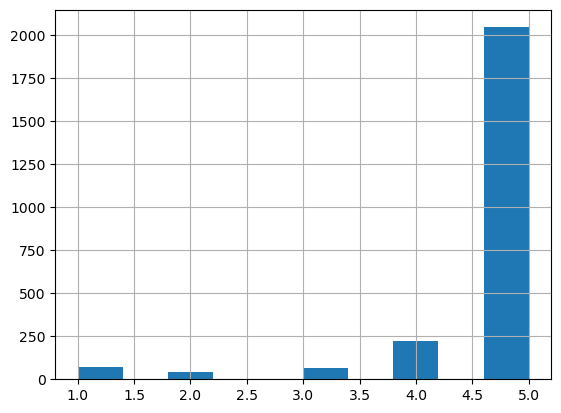

In [46]:
df['reviews.rating'].hist()

In [47]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
df['y'] = df['reviews.rating'].apply(lambda x: rating_to_label(x))

In [48]:
df.head()

,reviews.rating,reviews.text,y
0,5.0,this a fantastic white wine for any occasion,1
1,5.0,tart not sweet very refreshing and delicious,1
2,5.0,i was given this wine so it was a delightful s...,1
3,5.0,this is a phenomenal wine and my new favorite red,1
4,5.0,ml bottles for the price of two with way les...,1


In [49]:
df["y"].value_counts()
#모델의 Feature 변수는 리뷰에서 추출된 형태소와 그들의 중요도를 나타나는 tf_idf_vect로 대체

1    2268
0     177
Name: y, dtype: int64

### 3.2 Training set / Test set 나누기

In [50]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [51]:
x_train.shape, y_train.shape

((1711, 4749), (1711,))

In [52]:
x_test.shape, y_test.shape

((734, 4749), (734,))

### 3.3 모델 학습
Logistic Regression 모델 학습

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

## | 4. 모델 평가

In [54]:
# 테스트 세트의 분류 결과

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.93
precision: 0.93
recall: 1.00
F1: 0.96


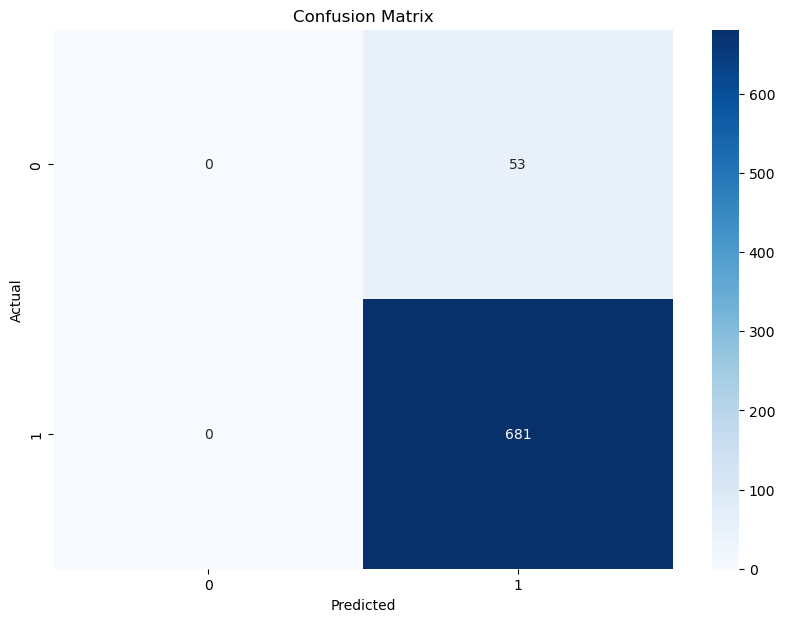

In [55]:
# confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- 실제 클래스 0, 예측 클래스 0: 0 (True Negative, TN)
- 실제 클래스 0, 예측 클래스 1: 53 (False Positive, FP)
- 실제 클래스 1, 예측 클래스 0: 0 (False Negative, FN)
- 실제 클래스 1, 예측 클래스 1: 681 (True Positive, TP)

모델 평과 결과를 살펴볼 때 지나치게 긍정으로면 예측하는 경향이 있음, 부정 감정에 대한 예측 정확도가 매우 낮기 때문에 '클래스 불균형 조정'을 시도해야함

### 4.1 샘플링 재조정

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [57]:
# tf-idf 벡터 생성 (실제 tf_idf_vect가 이미 존재한다고 가정)
tfidf_vect = TfidfVectorizer()
tf_idf_vect = tfidf_vect.fit_transform(df['reviews.text'])

In [58]:
# 'y' 값이 1인 인덱스와 0인 인덱스를 적절히 샘플링
positive_random_idx = df[df['y'] == 1].sample(min(len(df[df['y'] == 1]), 100), random_state=12).index.tolist()
negative_random_idx = df[df['y'] == 0].sample(min(len(df[df['y'] == 0]), 100), random_state=12).index.tolist()

In [59]:
# 샘플링한 인덱스들을 합침
random_idx = positive_random_idx + negative_random_idx

In [60]:
# 인덱스가 범위 내에 있는지 확인
print(f"random_idx: {random_idx}")
print(f"tf_idf_vect.shape: {tf_idf_vect.shape}")

random_idx: [164, 2527, 1349, 691, 2460, 1021, 1604, 2451, 1336, 1861, 1778, 244, 1317, 256, 1479, 2044, 74, 1181, 2412, 580, 2056, 962, 2391, 2398, 1825, 1128, 807, 271, 615, 2198, 2013, 2007, 525, 1214, 1741, 1788, 2015, 2082, 2352, 212, 153, 534, 2484, 2073, 2292, 1256, 1989, 1121, 278, 1325, 1118, 688, 618, 1937, 1250, 2610, 1259, 1038, 1414, 2429, 1562, 2567, 2068, 206, 82, 257, 2597, 1397, 265, 1631, 1059, 2126, 1042, 161, 447, 2196, 1462, 2863, 2599, 1421, 2239, 1160, 2839, 2582, 1831, 2211, 2267, 2207, 1944, 466, 2618, 2229, 1135, 505, 2182, 2006, 2301, 2411, 1977, 461, 1441, 1166, 114, 1920, 511, 818, 376, 2845, 820, 901, 1503, 1447, 2874, 44, 821, 2861, 211, 223, 1429, 2678, 1756, 2506, 2786, 1073, 1435, 122, 2809, 2879, 2851, 219, 7, 1270, 233, 2875, 2880, 69, 816, 1258, 2461, 286, 250, 883, 1833, 2866, 2737, 2789, 1123, 1390, 2739, 1452, 814, 677, 1091, 709, 2855, 2295, 1358, 1113, 512, 972, 322, 1417, 2444, 1971, 2795, 1605, 2557, 2740, 1339, 2796, 1432, 581, 1209, 179, 88

In [61]:
# 범위 내의 인덱스만 선택
valid_random_idx = [idx for idx in random_idx if idx < tf_idf_vect.shape[0]]

In [62]:
# x와 y를 인덱스를 기준으로 선택
x = tf_idf_vect[valid_random_idx]
y = df['y'].iloc[valid_random_idx].values

In [63]:
# train/test 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [64]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (117, 5029)
x_test shape: (39, 5029)
y_train shape: (117,)
y_test shape: (39,)


### 4.2 모델 재학습

In [65]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [66]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.90
precision: 0.90
recall: 1.00
F1: 0.95


## | 5. 시각화
### 결과 시각화

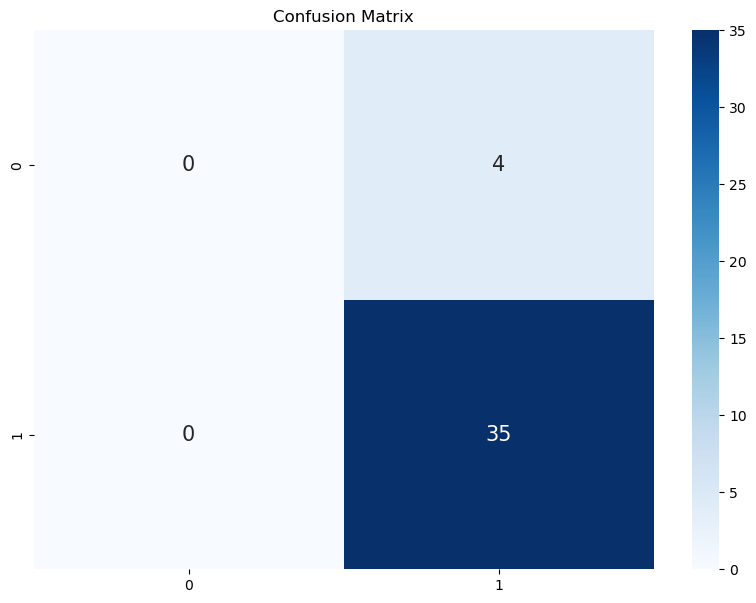

In [67]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='Blues', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

- 실제 클래스 0, 예측 클래스 0: 0 (True Negative, TN)
- 실제 클래스 0, 예측 클래스 1: 4 (False Positive, FP)
- 실제 클래스 1, 예측 클래스 0: 0 (False Negative, FN)
- 실제 클래스 1, 예측 클래스 1: 35 (True Positive, TP)

In [68]:
# 모델 학습
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [69]:
# 예측 확률 계산
y_probs = model.predict_proba(x_test)[:, 1]

In [70]:
# ROC 곡선 계산
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

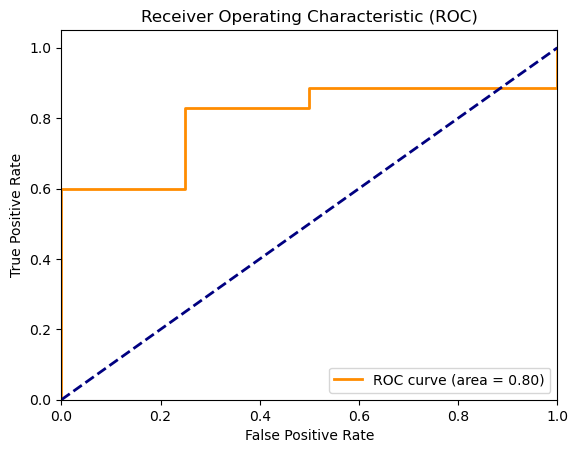

In [71]:
# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

모델의 AUC가 0.80으로 비교적 좋은 성능을 나타내고 있음을 확인.